In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = tf.constant(1)
b = tf.constant(2)

In [3]:
with tf.Session() as sess:
    print("a=1, b=2")
    print("Addition with constants: %d" % sess.run(a+b))
    print("Multiplication with constants: %d" % sess.run(a*b))

a=1, b=2
Addition with constants: 3
Multiplication with constants: 2


In [4]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.mul(a, b)

In [5]:
with tf.Session() as sess:
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


In [6]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1, matrix2)
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[ 12.]]


In [7]:
hello = tf.constant("Hello, TensorFlow!")
with tf.Session() as sess:
    print(sess.run(hello).decode("utf-8"))

Hello, TensorFlow!


## Linear Regression

In [8]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [9]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [10]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [11]:
pred = tf.add(tf.mul(X, W), b)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0050 cost= 0.452554256 W= 0.592067 b= -1.66226
Epoch: 0100 cost= 0.409180790 W= 0.571698 b= -1.51573
Epoch: 0150 cost= 0.370815128 W= 0.552541 b= -1.37792
Epoch: 0200 cost= 0.336878747 W= 0.534524 b= -1.2483
Epoch: 0250 cost= 0.306860864 W= 0.517577 b= -1.12639
Epoch: 0300 cost= 0.280308962 W= 0.501639 b= -1.01173
Epoch: 0350 cost= 0.256822348 W= 0.486649 b= -0.903893
Epoch: 0400 cost= 0.236047685 W= 0.47255 b= -0.802466
Epoch: 0450 cost= 0.217672154 W= 0.45929 b= -0.707074
Epoch: 0500 cost= 0.201418385 W= 0.446818 b= -0.617354
Epoch: 0550 cost= 0.187041551 W= 0.435089 b= -0.532971
Epoch: 0600 cost= 0.174324885 W= 0.424056 b= -0.453606
Epoch: 0650 cost= 0.163076788 W= 0.41368 b= -0.378961
Epoch: 0700 cost= 0.153127789 W= 0.403921 b= -0.308755
Epoch: 0750 cost= 0.144327715 W= 0.394743 b= -0.242725
Epoch: 0800 cost= 0.136544093 W= 0.38611 b= -0.180622
Epoch: 0850 cost= 0.129659534 W= 0.377991 b= -0.122213
Epoch: 0900 cost= 0.123570189 W= 0.370354 b= -0.0672771
Epoch: 0950 cost= 0.

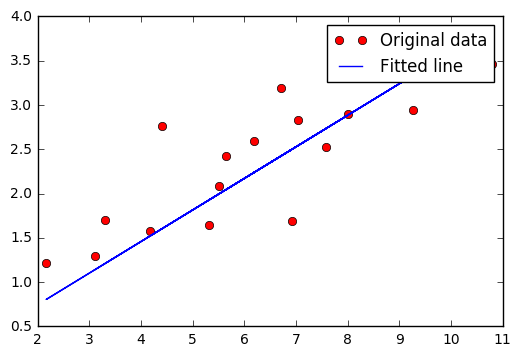

In [12]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print( "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Logistic Regression

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [14]:
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [15]:
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0001 cost= 1.182138977
Epoch: 0002 cost= 0.664741491
Epoch: 0003 cost= 0.552596705
Epoch: 0004 cost= 0.498578697
Epoch: 0005 cost= 0.465453126
Epoch: 0006 cost= 0.442545520
Epoch: 0007 cost= 0.425524179
Epoch: 0008 cost= 0.412158314
Epoch: 0009 cost= 0.401341256
Epoch: 0010 cost= 0.392413241
Epoch: 0011 cost= 0.384750766
Epoch: 0012 cost= 0.378126123
Epoch: 0013 cost= 0.372350748
Epoch: 0014 cost= 0.367287024
Epoch: 0015 cost= 0.362733242
Epoch: 0016 cost= 0.358612278
Epoch: 0017 cost= 0.354871403
Epoch: 0018 cost= 0.351437844
Epoch: 0019 cost= 0.348314650
Epoch: 0020 cost= 0.345403774
Epoch: 0021 cost= 0.342749975
Epoch: 0022 cost= 0.340260535
Epoch: 0023 cost= 0.337889766
Epoch: 0024 cost= 0.335730529
Epoch: 0025 cost= 0.333712942
Optimization Finished!
Accuracy: 0.889


## Nearest Neighbor

In [17]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.neg(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [18]:
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.neg(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Test 0 Prediction: 3 True Class: 3
Test 1 Prediction: 6 True Class: 6
Test 2 Prediction: 1 True Class: 1
Test 3 Prediction: 1 True Class: 1
Test 4 Prediction: 1 True Class: 1
Test 5 Prediction: 3 True Class: 3
Test 6 Prediction: 9 True Class: 9
Test 7 Prediction: 5 True Class: 5
Test 8 Prediction: 2 True Class: 2
Test 9 Prediction: 9 True Class: 9
Test 10 Prediction: 4 True Class: 4
Test 11 Prediction: 5 True Class: 5
Test 12 Prediction: 9 True Class: 9
Test 13 Prediction: 3 True Class: 3
Test 14 Prediction: 9 True Class: 9
Test 15 Prediction: 0 True Class: 0
Test 16 Prediction: 3 True Class: 3
Test 17 Prediction: 5 True Class: 6
Test 18 Prediction: 5 True Class: 5
Test 19 Prediction: 3 True Class: 5
Test 20 Prediction: 7 True Class: 7
Test 21 Prediction: 2 True Class: 2
Test 22 Prediction: 2 True Class: 2
Test 23 Prediction: 7 True Class: 7
Test 24 Prediction: 1 True Class: 1
Test 25 Prediction: 3 True Class: 2
Test 26 Prediction: 8 True Class: 8
Test 27 Prediction: 4 True Class: 4
Te